# Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
# Load the dataset
file_path = '/content/exercise_dataset.csv'  # Update this path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3  


In [3]:

# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64


In [4]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Exercise'] = label_encoder.fit_transform(data['Exercise'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Weather Conditions'] = label_encoder.fit_transform(data['Weather Conditions'])

# Display the dataset after encoding
print("\nDataset after encoding categorical variables:\n", data.head())


Dataset after encoding categorical variables:
    ID  Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1         2     286.959851     91.892531      96.301115   45       1   
1   2         7     343.453036     64.165097      61.104668   25       1   
2   3         4     261.223465     70.846224      71.766724   20       1   
3   4         5     127.183858     79.477008      82.984456   33       1   
4   5         1     416.318374     89.960226      85.643174   29       0   

   Duration  Heart Rate        BMI  Weather Conditions  Exercise Intensity  
0        37         170  29.426275                   1                   5  
1        43         142  21.286346                   1                   5  
2        20         148  27.899592                   0                   4  
3        39         170  33.729552                   2                  10  
4        34         118  23.286113                   0                   3  


In [5]:
# Select features and target variable
features = data.drop(columns=['Calories Burn', 'ID'])
target = data['Calories Burn']

# Normalize numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("\nShapes of training and testing sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of training and testing sets:
X_train: (3091, 10)
X_test: (773, 10)
y_train: (3091,)
y_test: (773,)


---

# Linear Regression




In [9]:
# Import necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 13244.263586161274
R-squared (R2 ): -0.0012654034911763201


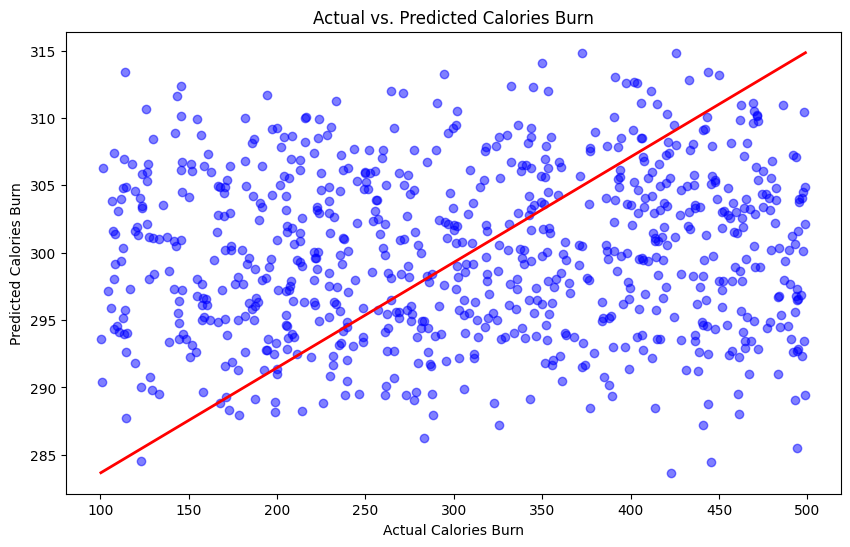

In [12]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', lw=2)
plt.xlabel('Actual Calories Burn')
plt.ylabel('Predicted Calories Burn')
plt.title('Actual vs. Predicted Calories Burn')
plt.show()

# Logistic Regression

In [13]:
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Convert the target variable into binary classes
median_calories = y_train.median()
y_train_binary = (y_train > median_calories).astype(int)
y_test_binary = (y_test > median_calories).astype(int)


In [15]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train_binary)

LogisticRegression(max_iter=1000)

In [16]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_binary, y_pred)
conf_matrix = confusion_matrix(y_test_binary, y_pred)
class_report = classification_report(y_test_binary, y_pred)


print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.538163001293661
Confusion Matrix:
[[199 165]
 [192 217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       364
           1       0.57      0.53      0.55       409

    accuracy                           0.54       773
   macro avg       0.54      0.54      0.54       773
weighted avg       0.54      0.54      0.54       773



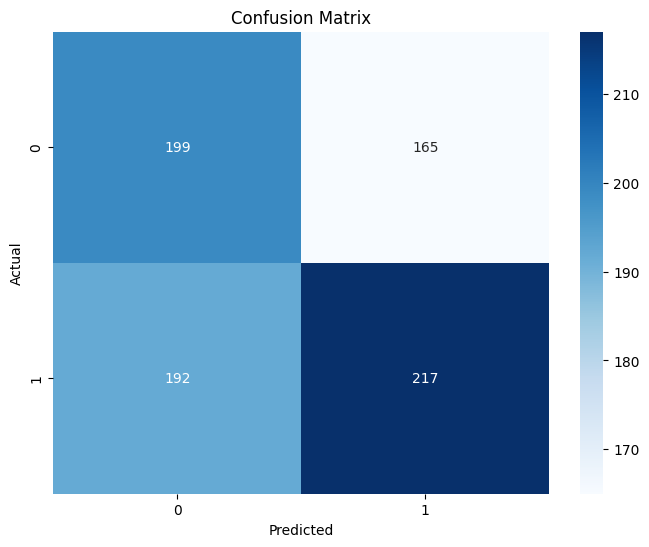

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---
#SVM

In [18]:
# Import necessary libraries for SVM Classification
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
# Initialize the SVM model
svm_model = SVC(probability=True)

# Train the model
svm_model.fit(X_train, y_train_binary)

SVC(probability=True)

In [20]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test_binary, y_pred)
conf_matrix = confusion_matrix(y_test_binary, y_pred)
class_report = classification_report(y_test_binary, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.49159120310478654
Confusion Matrix:
[[197 167]
 [226 183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.54      0.50       364
           1       0.52      0.45      0.48       409

    accuracy                           0.49       773
   macro avg       0.49      0.49      0.49       773
weighted avg       0.50      0.49      0.49       773



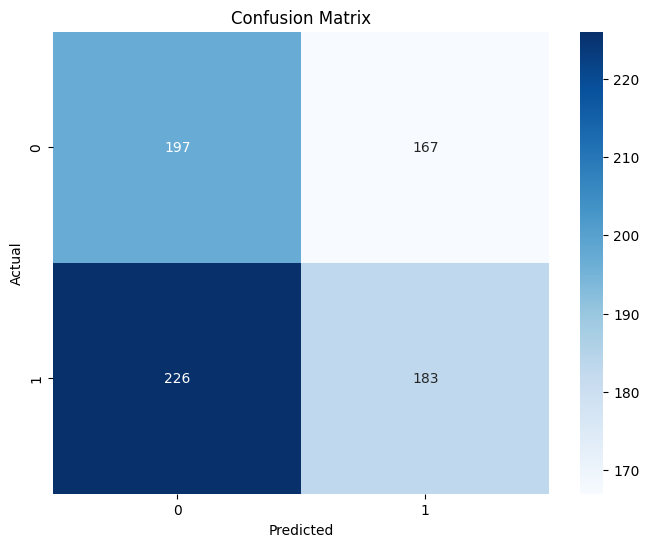

In [21]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

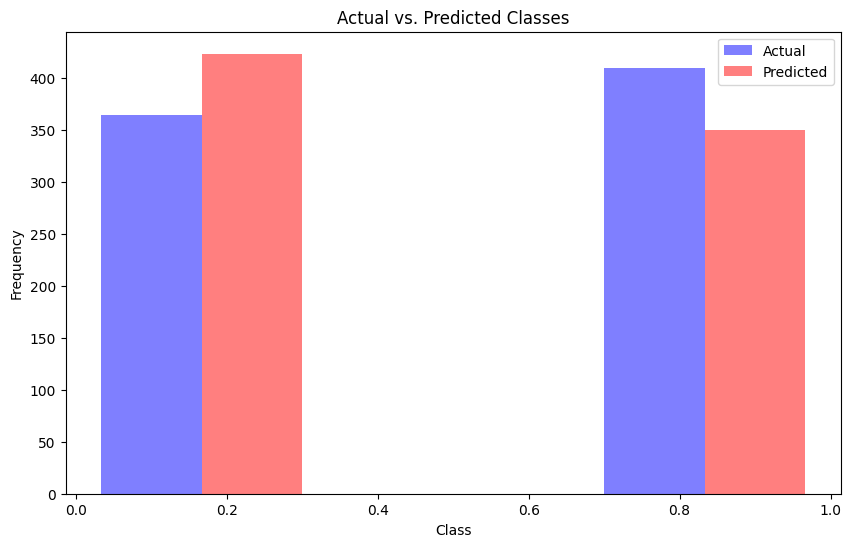

In [22]:
# Bar plot for actual vs predicted
plt.figure(figsize=(10, 6))
plt.hist([y_test_binary, y_pred], label=['Actual', 'Predicted'], bins=3, color=['blue', 'red'], alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Actual vs. Predicted Classes')
plt.legend()
plt.show()

---
# Decision Tree

In [23]:
# Import necessary libraries for Decision Tree Classification and visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [24]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training set
decision_tree_model.fit(X_train, y_train_binary)

DecisionTreeClassifier(random_state=42)

In [25]:
# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_binary, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test_binary, y_pred_dt)
class_report_dt = classification_report(y_test_binary, y_pred_dt)

print(f"Accuracy: {accuracy_dt}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(class_report_dt)

Accuracy: 0.5122897800776197
Confusion Matrix:
[[191 173]
 [204 205]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.52      0.50       364
           1       0.54      0.50      0.52       409

    accuracy                           0.51       773
   macro avg       0.51      0.51      0.51       773
weighted avg       0.51      0.51      0.51       773



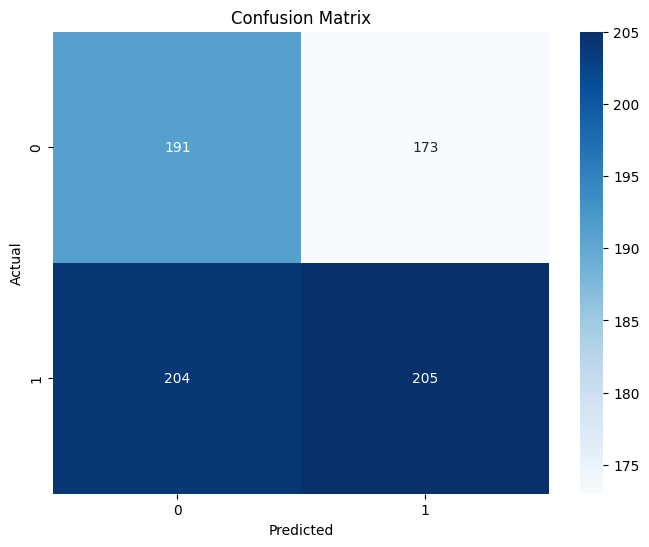

In [26]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


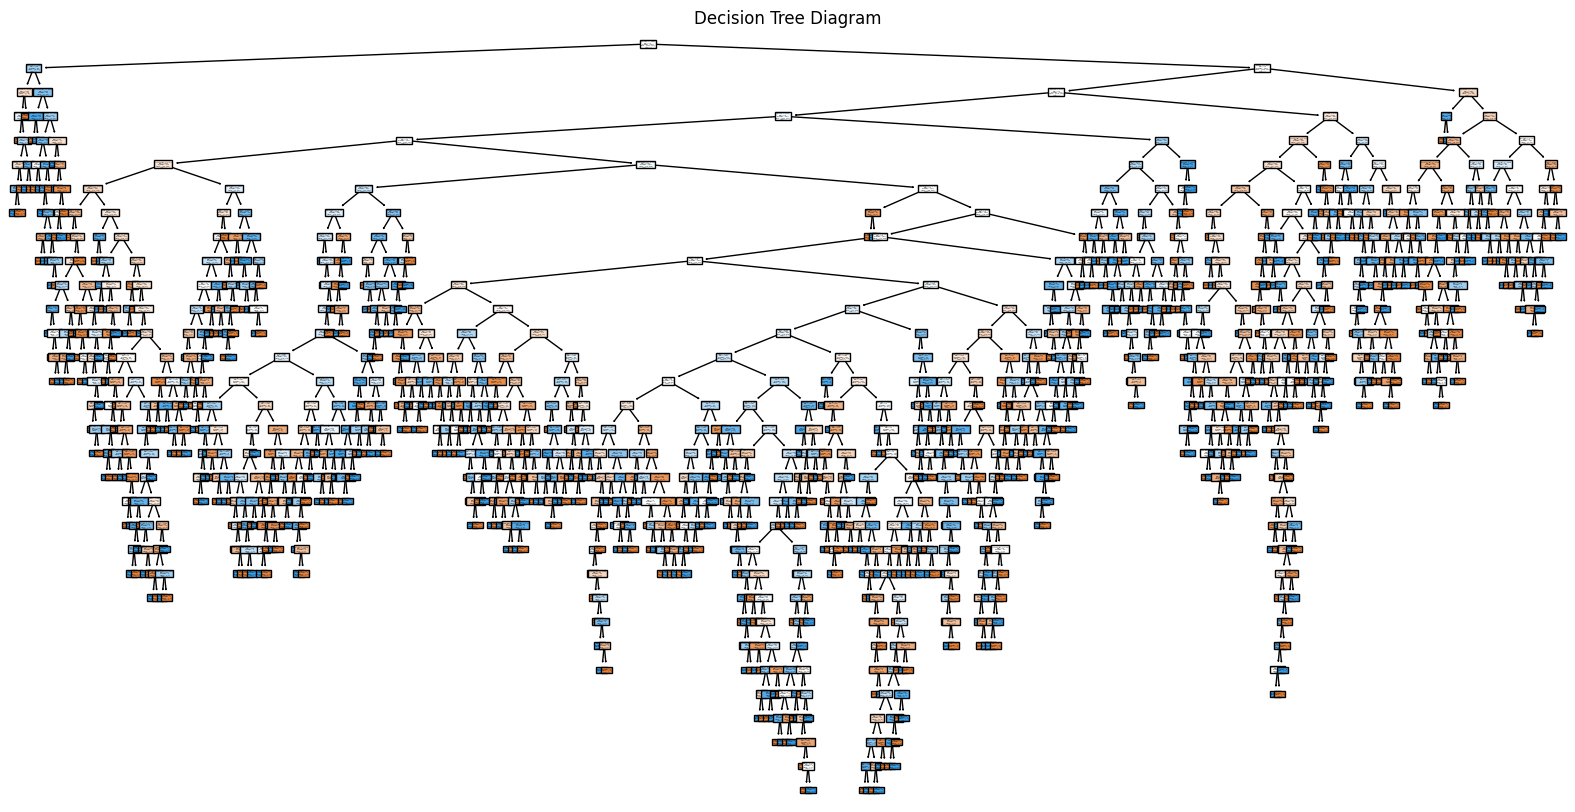

In [27]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=data.columns[:-1], class_names=['0', '1'], filled=True)
plt.title('Decision Tree Diagram')
plt.show()

---
# Random Forest

In [34]:
# Import necessary libraries for Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model using the training set
random_forest_model.fit(X_train, y_train_binary)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_binary, y_pred_rf)
class_report_rf = classification_report(y_test_binary, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

Accuracy: 0.47736093143596375
Confusion Matrix:
[[181 183]
 [221 188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.47       364
           1       0.51      0.46      0.48       409

    accuracy                           0.48       773
   macro avg       0.48      0.48      0.48       773
weighted avg       0.48      0.48      0.48       773



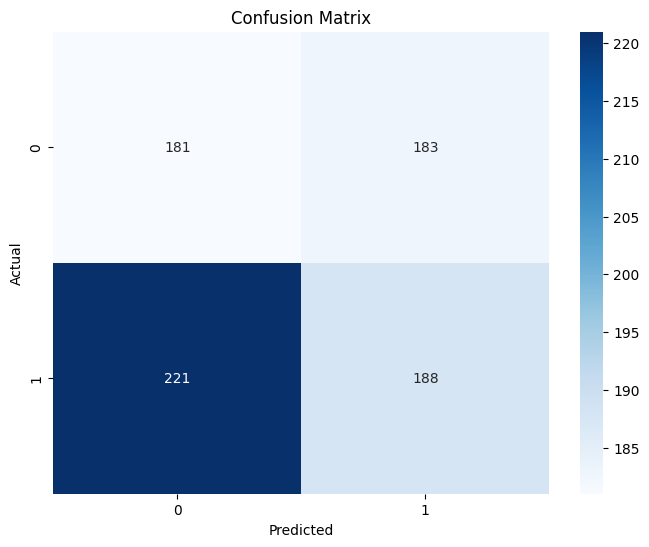

In [31]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

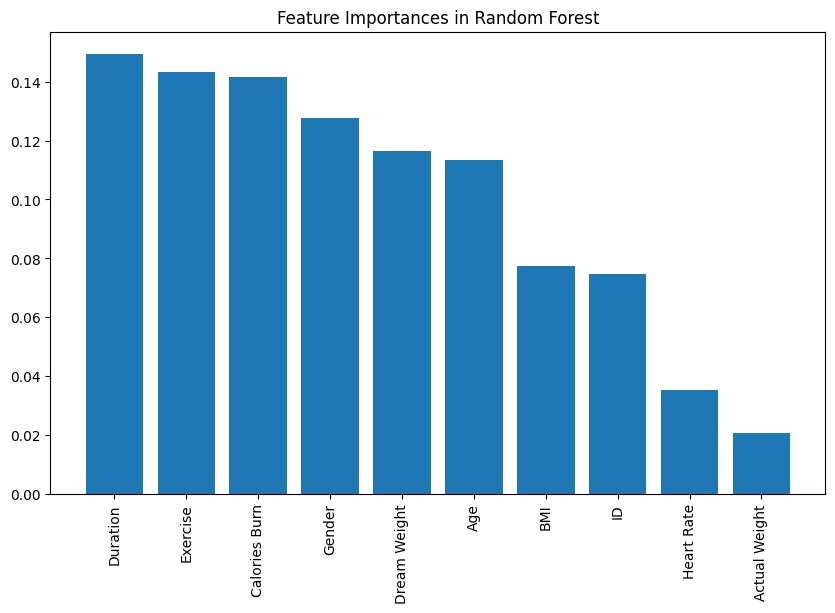

In [37]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances = random_forest_model.feature_importances_
features = data.columns[:-1]
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.title('Feature Importances in Random Forest')
plt.show()

---
# Naive Bayes Classification

In [40]:
# Import necessary libraries for Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB

In [41]:
# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model using the training set
naive_bayes_model.fit(X_train, y_train_binary)

GaussianNB()

In [42]:
# Make predictions on the test set
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test_binary, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test_binary, y_pred_nb)
class_report_nb = classification_report(y_test_binary, y_pred_nb)

print(f"Accuracy: {accuracy_nb}")
print("Confusion Matrix:")
print(conf_matrix_nb)
print("Classification Report:")
print(class_report_nb)

Accuracy: 0.5446313065976714
Confusion Matrix:
[[204 160]
 [192 217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       364
           1       0.58      0.53      0.55       409

    accuracy                           0.54       773
   macro avg       0.55      0.55      0.54       773
weighted avg       0.55      0.54      0.54       773



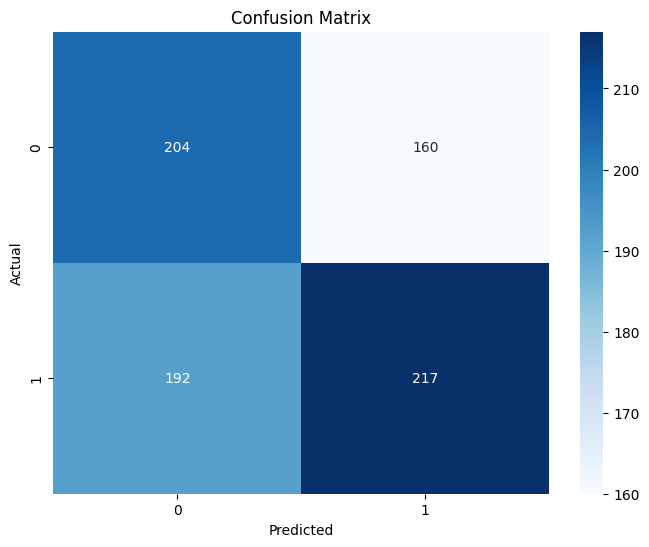

In [43]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---
# KNN Classification

In [44]:
# Import necessary libraries for KNN Classification
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training set
knn_model.fit(X_train, y_train_binary)

KNeighborsClassifier()

In [48]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_binary, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_binary, y_pred_knn)
class_report_knn = classification_report(y_test_binary, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(class_report_knn)

Accuracy: 0.48253557567917205
Confusion Matrix:
[[175 189]
 [211 198]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.48      0.47       364
           1       0.51      0.48      0.50       409

    accuracy                           0.48       773
   macro avg       0.48      0.48      0.48       773
weighted avg       0.48      0.48      0.48       773



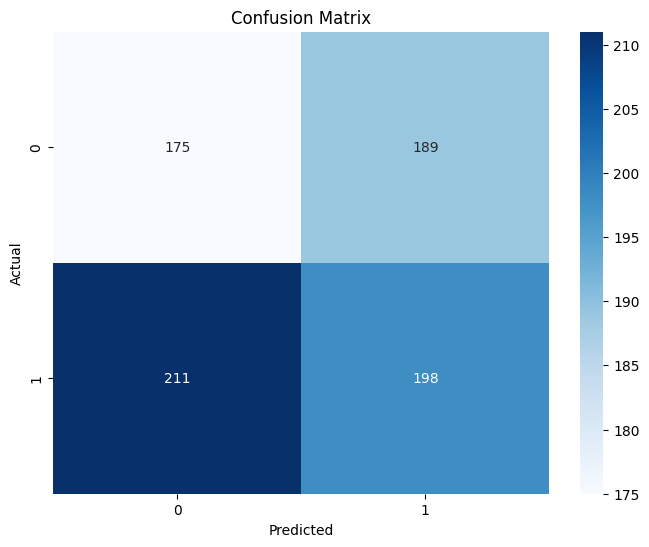

In [49]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()